In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns; sns.set()
from keras.engine.input_layer import Input
from keras.models import Sequential 
from keras.layers import Dense, Activation, InputLayer
from keras.utils import to_categorical
from sklearn.datasets import make_spd_matrix
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
import math
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Mean and covariance of gaussian 1

u1=np.array([-1,-1,-1])
# mean and covariance of gaussian 2
u2=np.array([1,1,1])
# mean and covariance of gaussian 3
u3=np.array([-1,1,-1])
# mean and covariance of gaussian 4
u4=np.array([1,-1,1])

t_covs = []
for s in range(4):
  t_covs.append(make_spd_matrix(3))

In [0]:
def samplegenerator(size,p):
  t1=0
  t2=0
  t3=0
  b=np.random.choice(4,size,p=[p[0],p[1],p[2],p[3]])
  for i in b:
    if i==1:
      t1=t1+1
    if i==2:
      t2=t2+1
    if i==3:
      t3=t3+1  
  size1=[size-t1-t2-t3,t1,t2,t3]
  return size1

In [0]:
def plotscatter(x1,x2,x3,x4):

  fig=plt.figure(figsize=(15,12))
  ax =fig.add_subplot(111,projection='3d')
  ax.scatter(x1[:,0],x1[:,1],x1[:,2],label='class1')
  ax.scatter(x2[:,0],x2[:,1],x2[:,2],label='class2')
  ax.scatter(x3[:,0],x3[:,1],x3[:,2],label='class3')
  ax.scatter(x4[:,0],x4[:,1],x4[:,2],label='class4')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.legend()
  plt.show()
  

In [0]:
p=[0.19,0.21,0.36,0.24]

def functionmain(size,u1,u2,u3,u4,t_covs,flag):
  global r1,r2,r3,r4,X,y
  x=samplegenerator(size,p)
  r1= np.random.multivariate_normal(u1,t_covs[0] , x[0])
  r2= np.random.multivariate_normal(u2, t_covs[1], x[1])
  r3= np.random.multivariate_normal(u3, t_covs[2], x[2])
  r4= np.random.multivariate_normal(u4, t_covs[3], x[3])
  X=np.concatenate((r1,r2,r3,r4),0)
  b=np.full((r1.shape[0],1), 0)
  c=np.full((r2.shape[0],1), 1)
  d=np.full((r3.shape[0],1), 2)
  e=np.full((r4.shape[0],1), 3)
  y=np.concatenate((b,c,d,e),0)


  if flag==1:
    plotscatter(r1,r2,r3,r4)
  else:
    return X,y
  

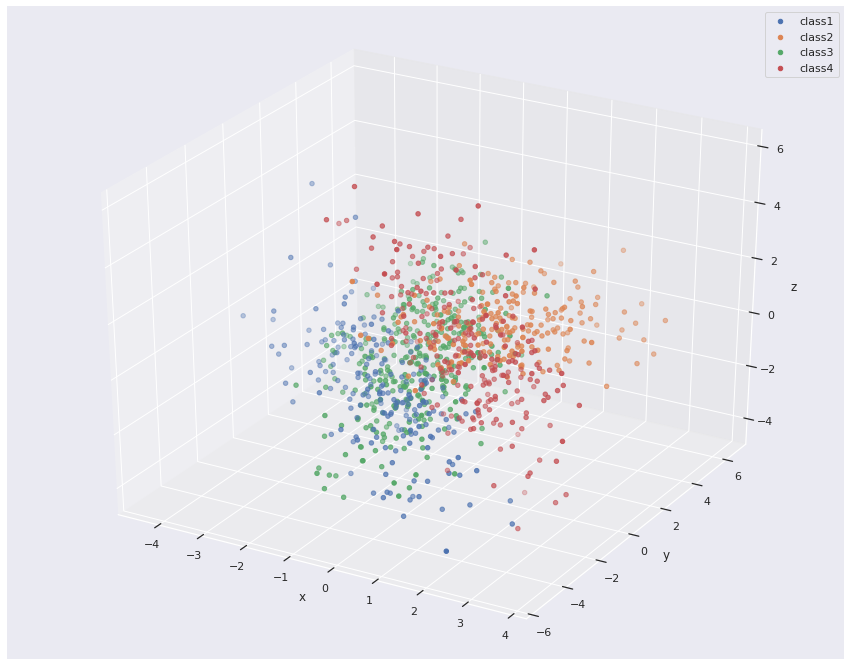

In [198]:
#plotting 1000 samples.

functionmain(1000,u1,u2,u3,u4,t_covs,1)

part b

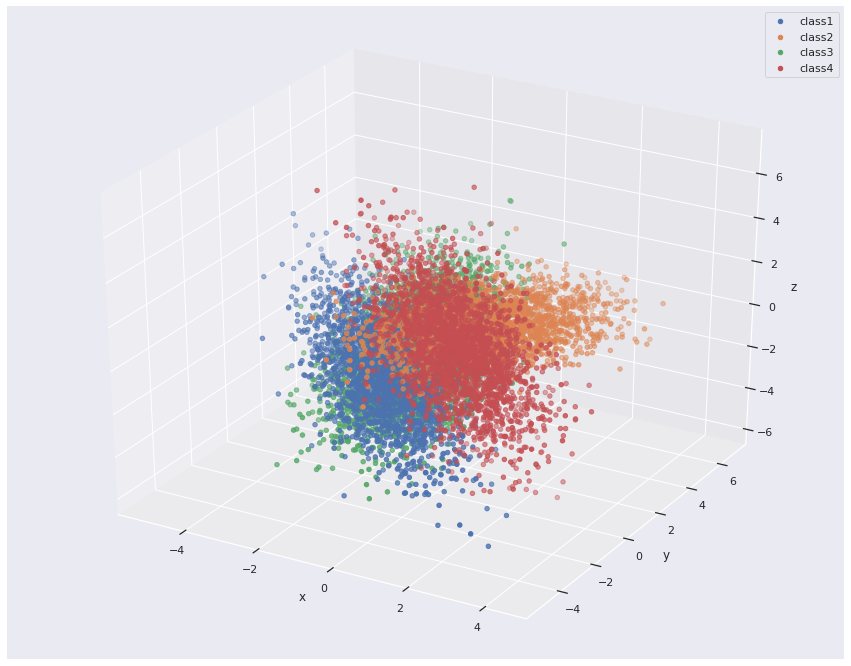

In [199]:

#plotting 10k points 
functionmain(10000,u1,u2,u3,u4,t_covs,1)


In [0]:

#saving 10k points into X_map10k and y_map10k which 

X_map10k=X
y_map10k=y
k_new=to_categorical(y)

In [0]:
# calculating the generator function
px1=0.19
px2=0.21
px3=0.36
px4=0.24

sigmainv1=np.linalg.inv(t_covs[0])
sigmainv2=np.linalg.inv(t_covs[1])
sigmainv3=np.linalg.inv(t_covs[2])
sigmainv4=np.linalg.inv(t_covs[3])

W1=(-1/2)*sigmainv1
w1=sigmainv1@(u1.reshape(3,1))
w10=(-1/2)*(u1.reshape(3,1).T)@sigmainv1@u1.reshape(3,1)-0.5*np.log(np.linalg.det(t_covs[0]))+np.log(px1)
W2=-0.5*sigmainv2
w2=sigmainv2@(u2.reshape(3,1))
w20=(-1/2)*(u2.reshape(3,1).T)@sigmainv2@u2.reshape(3,1)-0.5*np.log(np.linalg.det(t_covs[1]))+np.log(px2)
W3=-0.5*sigmainv3
w3=sigmainv3@(u3.reshape(3,1))
w30=(-1/2)*(u3.reshape(3,1).T)@sigmainv3@u3.reshape(3,1)-0.5*np.log(np.linalg.det(t_covs[2]))+np.log(px3)
W4=-0.5*sigmainv4
w4=sigmainv4@(u4.reshape(3,1))
w40=(-1/2)*(u4.reshape(3,1).T)@sigmainv4@u4.reshape(3,1)-0.5*np.log(np.linalg.det(t_covs[3]))+np.log(px4)


g11=np.diag(r1@W1@r1.T)+w1.T@r1.T+w10
g12=np.diag(r2@W1@r2.T)+w1.T@r2.T+w10
g13=np.diag(r3@W1@r3.T)+w1.T@r3.T+w10
g14=np.diag(r4@W1@r4.T)+w1.T@r4.T+w10
g24=np.diag(r4@W2@r4.T)+w2.T@r4.T+w20
g23=np.diag(r3@W2@r3.T)+w2.T@r3.T+w20
g22=np.diag(r2@W2@r2.T)+w2.T@r2.T+w20
g21=np.diag(r1@W2@r1.T)+w2.T@r1.T+w20
g34=np.diag(r4@W3@r4.T)+w3.T@r4.T+w30
g33=np.diag(r3@W3@r3.T)+w3.T@r3.T+w30
g32=np.diag(r2@W3@r2.T)+w3.T@r2.T+w30
g31=np.diag(r1@W3@r1.T)+w3.T@r1.T+w30
g41=np.diag(r1@W4@r1.T)+w4.T@r1.T+w40
g42=np.diag(r2@W4@r2.T)+w4.T@r2.T+w40
g43=np.diag(r3@W4@r3.T)+w4.T@r3.T+w40
g44=np.diag(r4@W4@r4.T)+w4.T@r4.T+w40

In [0]:
# CLASSIFICATION OF SAMPLES BY USING MAP
k11=((g11>g21)&(g11>g31)&(g11>g41))
k21=((g21>g11)&(g21>g31)&(g21>g41))
k31=((g31>g21)&(g31>g11)&(g31>g41))
k41=((g41>g21)&(g41>g11)&(g41>g31))

k12=((g12>g22)&(g12>g32)&(g12>g42))
k22=((g22>g12)&(g22>g32)&(g22>g42))
k32=((g32>g22)&(g32>g12)&(g32>g42))
k42=((g42>g22)&(g42>g12)&(g42>g32))

k13=((g13>g23)&(g13>g33)&(g13>g43))
k23=((g23>g13)&(g23>g33)&(g23>g43))
k33=((g33>g23)&(g33>g13)&(g33>g43))
k43=((g43>g23)&(g43>g13)&(g43>g33))

k14=((g14>g24)&(g14>g34)&(g14>g44))
k24=((g24>g14)&(g24>g34)&(g24>g44))
k34=((g34>g14)&(g34>g24)&(g34>g44))
k44=((g44>g14)&(g44>g24)&(g44>g34))

Text(0.5, 1, 'confusion matrix')

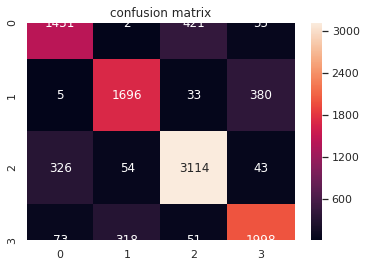

In [203]:
a=np.array([[k11.sum(),k21.sum(),k31.sum(),k41.sum()],[k12.sum(),k22.sum(),k32.sum(),k42.sum()],[k13.sum(),k23.sum(),k33.sum(),k43.sum()],[k14.sum(),k24.sum(),k34.sum(),k44.sum()]])
data=a
import seaborn as sns; sns.set()
col = ['l1','l2','l3','l4']
row=['c1','c2','c3','c4']

ax = sns.heatmap(data ,annot=True, fmt="d")

plt.title('confusion matrix')

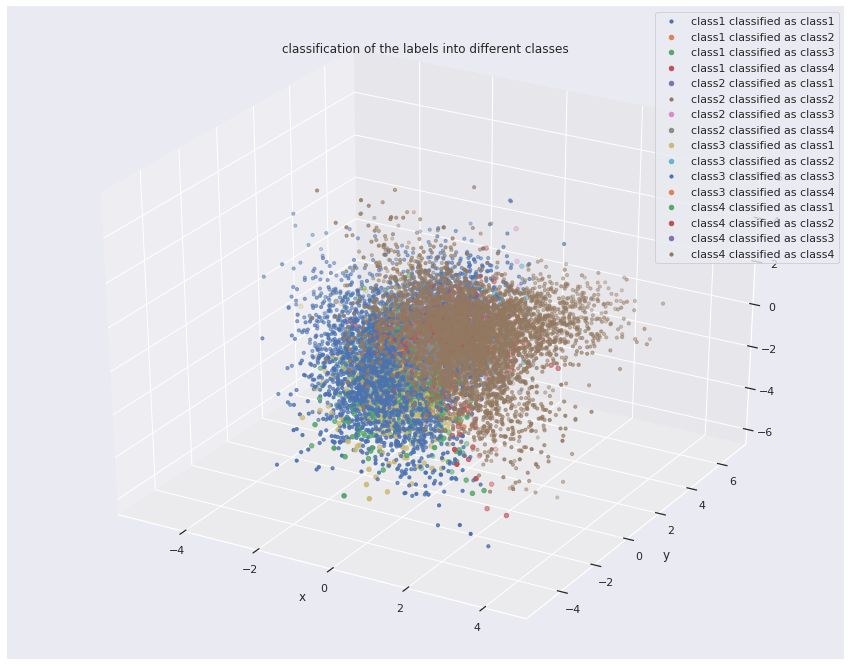

In [204]:
fig=plt.figure(figsize=(15,12))
ax =fig.add_subplot(111,projection='3d')
ax.scatter(r1.T[0,np.where(k11)[1]],r1.T[1,np.where(k11)[1]],r1.T[2,np.where(k11)[1]],s=10,label="class1 classified as class1")
ax.scatter(r1.T[0,np.where(k21)[1]],r1.T[1,np.where(k21)[1]],r1.T[2,np.where(k21)[1]],label="class1 classified as class2")
ax.scatter(r1.T[0,np.where(k31)[1]],r1.T[1,np.where(k31)[1]],r1.T[2,np.where(k31)[1]],label="class1 classified as class3")
ax.scatter(r1.T[0,np.where(k41)[1]],r1.T[1,np.where(k41)[1]],r1.T[2,np.where(k41)[1]],label="class1 classified as class4")

ax.scatter(r2.T[0,np.where(k12)[1]],r2.T[1,np.where(k12)[1]],r2.T[2,np.where(k12)[1]],label="class2 classified as class1")
ax.scatter(r2.T[0,np.where(k22)[1]],r2.T[1,np.where(k22)[1]],r2.T[2,np.where(k22)[1]],s=10,label="class2 classified as class2")
ax.scatter(r2.T[0,np.where(k32)[1]],r2.T[1,np.where(k32)[1]],r2.T[2,np.where(k32)[1]],label="class2 classified as class3")
ax.scatter(r2.T[0,np.where(k42)[1]],r2.T[1,np.where(k42)[1]],r2.T[2,np.where(k42)[1]],label="class2 classified as class4")

ax.scatter(r3.T[0,np.where(k13)[1]],r3.T[1,np.where(k13)[1]],r3.T[2,np.where(k13)[1]],label="class3 classified as class1")
ax.scatter(r3.T[0,np.where(k23)[1]],r3.T[1,np.where(k23)[1]],r3.T[2,np.where(k23)[1]],label="class3 classified as class2")
ax.scatter(r3.T[0,np.where(k33)[1]],r3.T[1,np.where(k33)[1]],r3.T[2,np.where(k33)[1]],s=10,label="class3 classified as class3")
ax.scatter(r3.T[0,np.where(k43)[1]],r3.T[1,np.where(k43)[1]],r3.T[2,np.where(k43)[1]],label="class3 classified as class4")

ax.scatter(r4.T[0,np.where(k14)[1]],r4.T[1,np.where(k14)[1]],r4.T[2,np.where(k14)[1]],label="class4 classified as class1")
ax.scatter(r4.T[0,np.where(k24)[1]],r4.T[1,np.where(k24)[1]],r4.T[2,np.where(k24)[1]],label="class4 classified as class2")
ax.scatter(r4.T[0,np.where(k34)[1]],r4.T[1,np.where(k34)[1]],r4.T[2,np.where(k34)[1]],label="class4 classified as class3")
ax.scatter(r4.T[0,np.where(k44)[1]],r4.T[1,np.where(k44)[1]],r4.T[2,np.where(k44)[1]],s=10,label="class4 classified as class4")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')
plt.title('classification of the labels into different classes')
plt.show()

## plotting only the correctly classified points

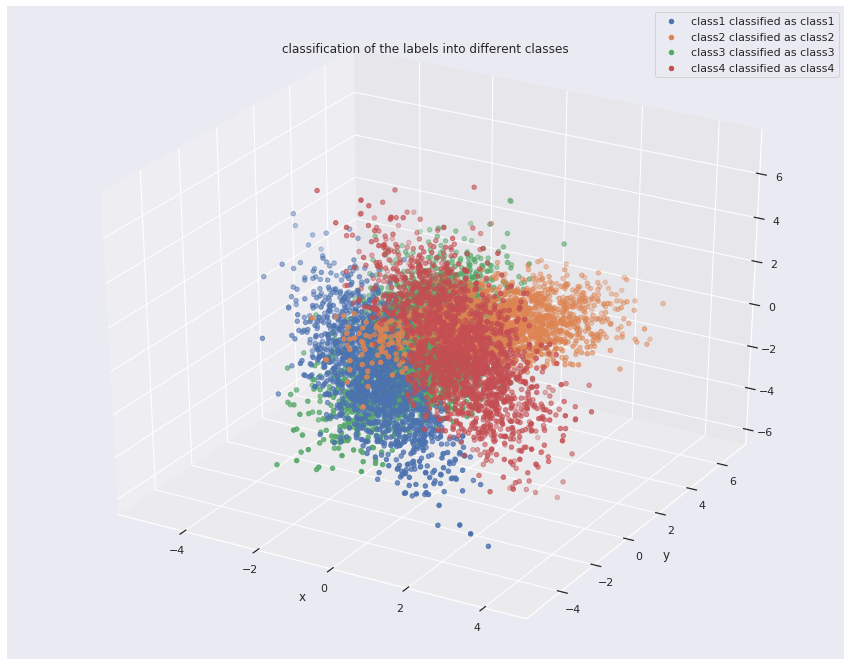

In [205]:
fig=plt.figure(figsize=(15,12))
ax =fig.add_subplot(111,projection='3d')
ax.scatter(r1.T[0,np.where(k11)[1]],r1.T[1,np.where(k11)[1]],r1.T[2,np.where(k11)[1]],label="class1 classified as class1")
ax.scatter(r2.T[0,np.where(k22)[1]],r2.T[1,np.where(k22)[1]],r2.T[2,np.where(k22)[1]],label="class2 classified as class2")
ax.scatter(r3.T[0,np.where(k33)[1]],r3.T[1,np.where(k33)[1]],r3.T[2,np.where(k33)[1]],label="class3 classified as class3")
ax.scatter(r4.T[0,np.where(k44)[1]],r4.T[1,np.where(k44)[1]],r4.T[2,np.where(k44)[1]],label="class4 classified as class4")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')
plt.title('classification of the labels into different classes')
plt.show()

##calculation of probability of error of MAP

In [206]:
#probability of error for map classifier is given by 
pr=(k11.sum()+k22.sum()+k33.sum()+k44.sum())/10000
probability_of_error=1-pr
print("probability of error is given by {}".format(1-pr)) 

probability of error is given by 0.17610000000000003


PART C

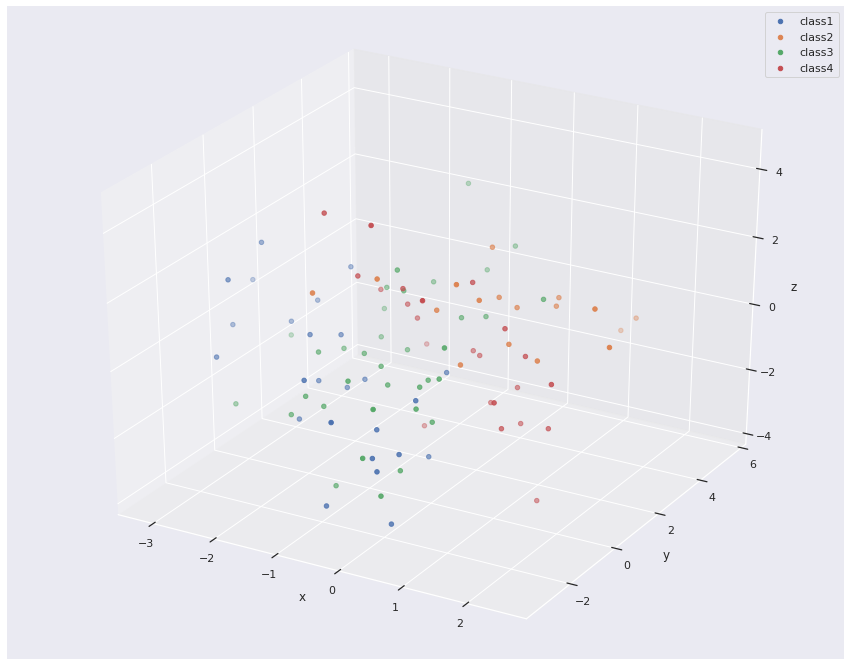

In [207]:
functionmain(100,u1,u2,u3,u4,t_covs,1)

In [0]:
def baseline_model(i=0):
  model = Sequential() 
  model.add(Dense(i, input_shape=(3,), activation='sigmoid'))
  model.add(Dense(4, activation='softmax'))
  model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
  return model
# model.summary()

In [209]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)
i=[12,15,18,21,24,27,30,33]
param_grid = dict(i=i)
kfold = KFold(n_splits=10, shuffle=True)
k=to_categorical(y)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kfold,n_jobs=-1)
grid_result = grid.fit(X, k)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for stdev, param in zip(stds, params):
    print(" %f with: %r" % ( stdev, param))

Best: 0.540000 using {'i': 21}
 0.168819 with: {'i': 12}
 0.155242 with: {'i': 15}
 0.148324 with: {'i': 18}
 0.156205 with: {'i': 21}
 0.128452 with: {'i': 24}
 0.155242 with: {'i': 27}
 0.168523 with: {'i': 30}
 0.177764 with: {'i': 33}


In [0]:
bb=grid_result.best_params_['i']

In [0]:
def baseline_model2(bb): 
  model = Sequential() 
  model.add(Dense(bb, input_shape=(3,), activation='sigmoid'))
  model.add(Dense(4, activation='softmax'))
  model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
  model.fit(X,k,epochs=100)
  _, accuracy=model.evaluate(X_map10k, k_new)
  return accuracy

In [212]:
baseline_model2(bb)

Epoch 1/100
100/100 [==============================] - 1s 15ms/step - loss: 1.4553 - acc: 0.2800
Epoch 2/100
100/100 [==============================] - 0s 249us/step - loss: 1.4482 - acc: 0.3000
Epoch 3/100
100/100 [==============================] - 0s 186us/step - loss: 1.4386 - acc: 0.3100
Epoch 4/100
100/100 [==============================] - 0s 215us/step - loss: 1.4310 - acc: 0.3400
Epoch 5/100
100/100 [==============================] - 0s 228us/step - loss: 1.4211 - acc: 0.3400
Epoch 6/100
100/100 [==============================] - 0s 205us/step - loss: 1.4157 - acc: 0.3600
Epoch 7/100
100/100 [==============================] - 0s 208us/step - loss: 1.4062 - acc: 0.3900
Epoch 8/100
100/100 [==============================] - 0s 194us/step - loss: 1.4001 - acc: 0.4100
Epoch 9/100
100/100 [==============================] - 0s 205us/step - loss: 1.3898 - acc: 0.4200
Epoch 10/100
100/100 [==============================] - 0s 197us/step - loss: 1.3840 - acc: 0.4300
Epoch 11/100
100/100

0.6515

## calculation of probability of error in the case of 100 samples.

In [214]:
print("probability of error in case 1 is given by {}".format(1-0.6515))

probability of error in case 1 is given by 0.34850000000000003


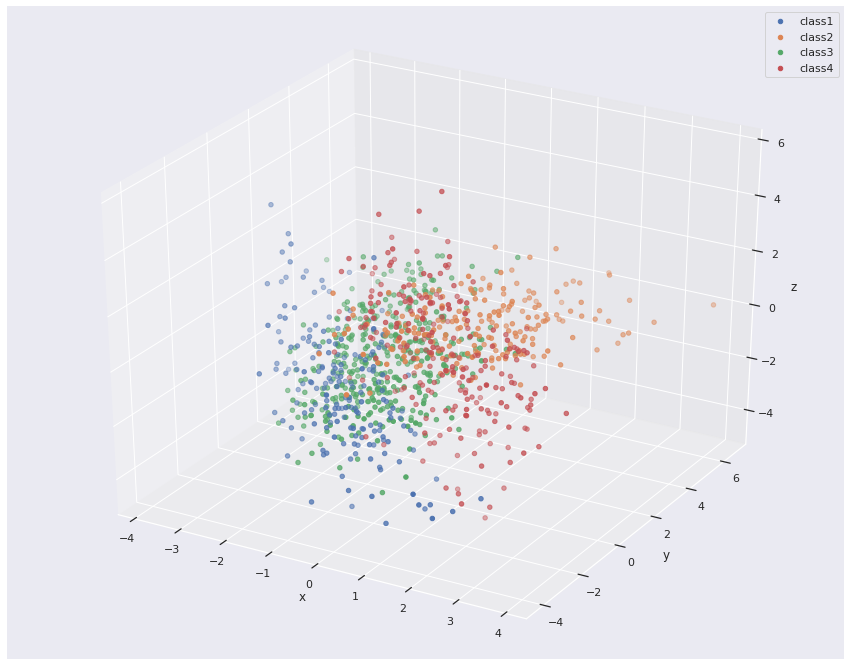

In [215]:
functionmain(1000,u1,u2,u3,u4,t_covs,1)

In [216]:

estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=100, verbose=0)
i=[12,15,18,21,24,27,30,33]
param_grid = dict(i=i)
kfold = KFold(n_splits=10, shuffle=True)
k=to_categorical(y)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kfold,n_jobs=-1)
grid_result = grid.fit(X, k)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for  stdev, param in zip( stds, params):
    print(" %f with: %r" % (stdev, param))

Best: 0.472000 using {'i': 21}
 0.100404 with: {'i': 12}
 0.134242 with: {'i': 15}
 0.077434 with: {'i': 18}
 0.075472 with: {'i': 21}
 0.092065 with: {'i': 24}
 0.087641 with: {'i': 27}
 0.057827 with: {'i': 30}
 0.039294 with: {'i': 33}


In [0]:
cc=grid_result.best_params_['i']

In [218]:
baseline_model2(cc)

Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 1.4842 - acc: 0.2520
Epoch 2/100
1000/1000 [==============================] - 0s 133us/step - loss: 1.4112 - acc: 0.3980
Epoch 3/100
1000/1000 [==============================] - 0s 132us/step - loss: 1.3606 - acc: 0.4050
Epoch 4/100
1000/1000 [==============================] - 0s 130us/step - loss: 1.3175 - acc: 0.4180
Epoch 5/100
1000/1000 [==============================] - 0s 129us/step - loss: 1.2800 - acc: 0.4410
Epoch 6/100
1000/1000 [==============================] - 0s 142us/step - loss: 1.2452 - acc: 0.4660
Epoch 7/100
1000/1000 [==============================] - 0s 147us/step - loss: 1.2133 - acc: 0.4800
Epoch 8/100
1000/1000 [==============================] - 0s 129us/step - loss: 1.1838 - acc: 0.4990
Epoch 9/100
1000/1000 [==============================] - 0s 133us/step - loss: 1.1562 - acc: 0.5260
Epoch 10/100
1000/1000 [==============================] - 0s 141us/step - loss: 1.1305 - acc: 0.5390
E

0.7751

## calculation of probability of error in the case of 1000 samples 

In [219]:
print("probability of error in the case 2 is given by {}".format(1-0.7751))

probability of error in the case 2 is given by 0.2249


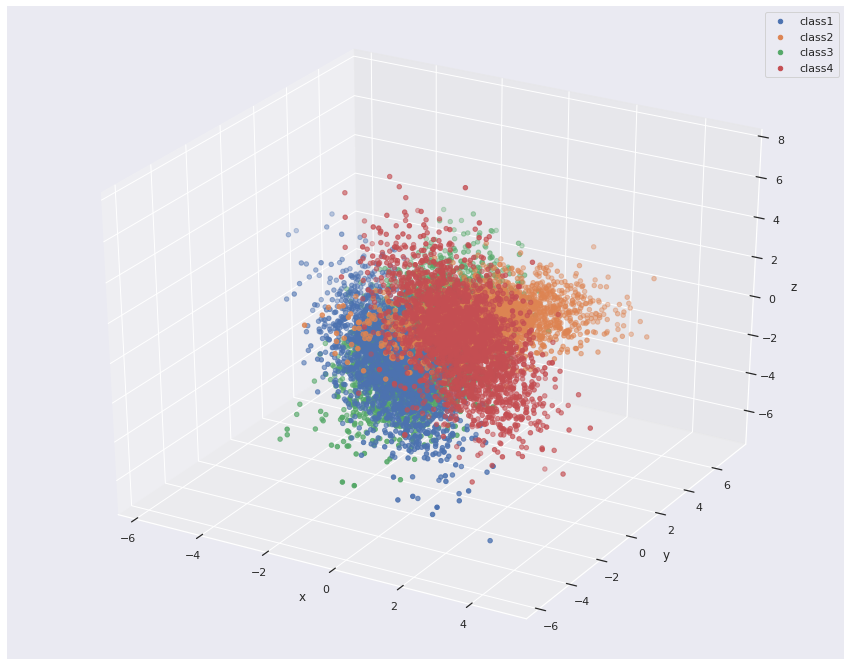

In [220]:
functionmain(10000,u1,u2,u3,u4,t_covs,1)

In [221]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=1000, verbose=0)
i=[12,15,18,21,24,27,30,33]
param_grid = dict(i=i)
kfold = KFold(n_splits=10, shuffle=True)
k=to_categorical(y)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kfold,n_jobs=-1)
grid_result = grid.fit(X, k)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for  stdev, param in zip(stds, params):
    print("%f with: %r" % (stdev, param))

Best: 0.460300 using {'i': 21}
0.066092 with: {'i': 12}
0.061276 with: {'i': 15}
0.072521 with: {'i': 18}
0.100886 with: {'i': 21}
0.076390 with: {'i': 24}
0.063199 with: {'i': 27}
0.087554 with: {'i': 30}
0.069060 with: {'i': 33}


In [0]:
dd=grid_result.best_params_['i']

In [223]:
baseline_model2(dd)

Epoch 1/100
10000/10000 [==============================] - 3s 286us/step - loss: 1.3503 - acc: 0.3999
Epoch 2/100
10000/10000 [==============================] - 1s 132us/step - loss: 1.0579 - acc: 0.6461
Epoch 3/100
10000/10000 [==============================] - 1s 129us/step - loss: 0.9075 - acc: 0.6845
Epoch 4/100
10000/10000 [==============================] - 1s 129us/step - loss: 0.8039 - acc: 0.7156
Epoch 5/100
10000/10000 [==============================] - 1s 134us/step - loss: 0.7331 - acc: 0.7421
Epoch 6/100
10000/10000 [==============================] - 1s 130us/step - loss: 0.6845 - acc: 0.7557
Epoch 7/100
10000/10000 [==============================] - 1s 127us/step - loss: 0.6505 - acc: 0.7608
Epoch 8/100
10000/10000 [==============================] - 1s 124us/step - loss: 0.6258 - acc: 0.7640
Epoch 9/100
10000/10000 [==============================] - 1s 123us/step - loss: 0.6073 - acc: 0.7709
Epoch 10/100
10000/10000 [==============================] - 1s 134us/step - loss: 

0.8014

## calculation of probability of error in the case of 10000 samples 

In [224]:
print("probability of error in the case 3 is given by {}".format(1-0.8014))

probability of error in the case 3 is given by 0.1986


# question 2

## data generation

In [0]:
mean1 = [-18, -8]
mean2 = [0, 0]
mean3 = [18, 8]
cov_eig_val = np.array([[3.2**2, 0], [0, 0.6**2]])
cov_eig_vec1 = np.array([[1, -1], [1, 1]])/math.sqrt(2)
cov_eig_vec2 = np.array([[1, 0], [0, 1]])
cov_eig_vec3 = np.array([[1, -1], [1, 1]])/math.sqrt(2)
cov1 = np.matmul(cov_eig_vec1, np.matmul(cov_eig_val, cov_eig_vec1.T))
cov2 = np.matmul(cov_eig_vec2, np.matmul(cov_eig_val, cov_eig_vec2.T))
cov3 = np.matmul(cov_eig_vec3, np.matmul(cov_eig_val, cov_eig_vec3.T))
p1 = 0.33
p2 = 0.34
p3 = 0.33

In [0]:
def samplegenerator11(size,p):
  t=0
  t1=0
  b=np.random.choice(3,size,p=[p[0],p[1],p[2]])
  for i in b:
    if i==1:
      t=t+1
    if i==2:
      t1=t1+1
  size1=[size-t-t1,t,t1]
  return size1

In [0]:
p1=[0.33,0.34,0.33]
v_c=samplegenerator11(1000,p1)
r1= np.random.multivariate_normal(mean1,cov1 ,v_c[0])
r2= np.random.multivariate_normal(mean2,cov2, v_c[1])
r3= np.random.multivariate_normal(mean3,cov3, v_c[2])
X_1=np.concatenate((r1,r2,r3),0)


In [0]:
#generating test data
b_c=samplegenerator11(10000,p1)
r11= np.random.multivariate_normal(mean1,cov1 ,b_c[0])
r12= np.random.multivariate_normal(mean2,cov2, b_c[1])
r13= np.random.multivariate_normal(mean3,cov3, b_c[2])
X_2=np.concatenate((r11,r12,r13),0)

In [0]:

def plot11(tt):
  plt.figure(figsize=(9,9))
  plt.scatter(tt.T[0,:],tt.T[1,:],label='data points',color='blue')
  plt.axis('equal')
  plt.title(' multi variate normal distribution curves of the  priors')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend(loc='upper left')
  plt.show()

## generating train data

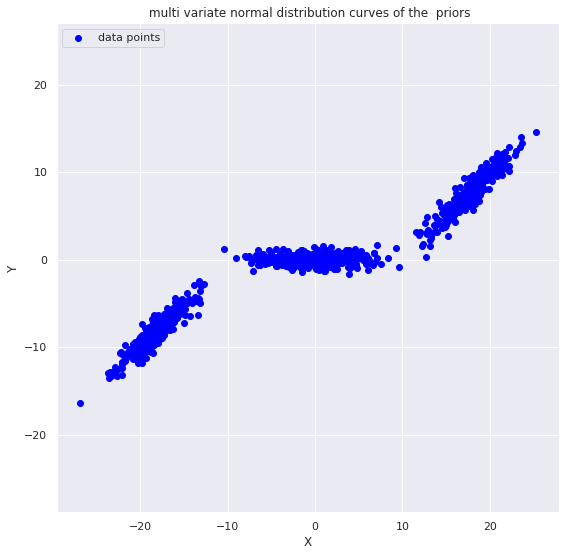

In [0]:
plot11(X_1)

## generating test data

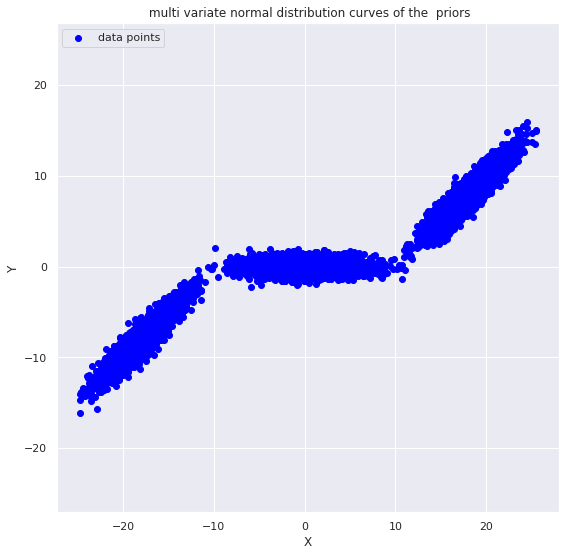

In [190]:
# generating the test data 
plot11(X_2)

In [0]:
def baseline_model1(i=0,activation='softplus'):
  model = Sequential() 
  model.add(Dense(i, input_dim=1, activation=activation))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer='adam', loss='mean_squared_error') 
  return model

In [187]:
estimator=KerasRegressor(build_fn=baseline_model1,epochs=50, batch_size=100, verbose=0)
i=[12,15,18,21,24,27,30,33]
activation=['sigmoid','softplus']
param_grid = dict(i=i,activation=activation)
kfold = KFold(n_splits=10, shuffle=True)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,n_jobs=-1)
grid_result = grid.fit(X_1[:,0],X_1[:,1])
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -2.121944 using {'activation': 'softplus', 'i': 27}


In [188]:
model = Sequential() 
model.add(Dense(27, input_dim=1, activation='softplus'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_1[:,0],X_1[:,1],epochs=10)
loss=model.evaluate(X_2[:,0],X_2[:,1])
predict=model.predict(X_2[:,0])
print(loss)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 77.1579
Epoch 2/10
1000/1000 [==============================] - 0s 130us/step - loss: 51.5582
Epoch 3/10
1000/1000 [==============================] - 0s 134us/step - loss: 32.4454
Epoch 4/10
1000/1000 [==============================] - 0s 138us/step - loss: 18.3041
Epoch 5/10
1000/1000 [==============================] - 0s 128us/step - loss: 8.7633
Epoch 6/10
1000/1000 [==============================] - 0s 123us/step - loss: 3.9635
Epoch 7/10
1000/1000 [==============================] - 0s 125us/step - loss: 2.7166
Epoch 8/10
1000/1000 [==============================] - 0s 157us/step - loss: 2.5363
Epoch 9/10
1000/1000 [==============================] - 0s 138us/step - loss: 2.4789
Epoch 10/10
10000/10000 [==============================] - 1s 102us/step
2.3853449920654297


In [0]:

def plot12(tt,pre):
  plt.figure(figsize=(9,9))
  plt.scatter(tt.T[0,:],tt.T[1,:],label='data points',color='blue')
  plt.scatter(tt.T[0,:],pre,label='predicted points',color='red')
  plt.axis('equal')
  plt.title(' plot of real data set and predicted points')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend(loc='upper left')
  plt.show()

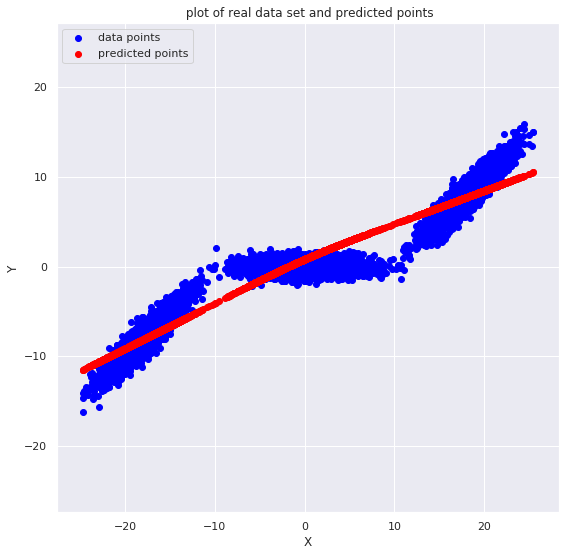

In [192]:
plot12(X_2,predict)